In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os
import statistics

## Reading Data

In [2]:
PATH = "../data/finals_frameworks"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [29]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    file_data.append(data_in)
    
data_original = pd.concat(file_data)

## Cleanup Data

In [30]:
data_original = data_original[data_original['fullscreen'] == 'fullscreen']
data_original = data_original[data_original['program'] != 'bitblt']
data_original = data_original[data_original['program'] != 'getdbits']

In [66]:
len(data_original[data_original['program'] != 'none'])

36800

In [33]:
len(data_original)

num_overall = 55200
num_nones = data_original[data_original['program'] == 'none'].count()
num_fw_measurements = num_overall-num_nones
num_fw_measurements

Unnamed: 0              36800
id                      36800
threshold               36800
framework               36800
complexity              36800
framework_complexity    36800
fullscreen              36800
fullscreen_mode         55200
program                 36800
ete_upper               36800
ete_lower               36800
fw                      36800
diff                    36800
dtype: int64

In [6]:
# remove absolute outliers
data = data_original.loc[~((data_original['framework'] == 'GDIplus') & (data_original['program'] == 'getpixel') & (data_original['diff'] > 7000) & (data_original['complexity'] == 'default'))] 
data = data_original.loc[~((data_original['framework'] == 'Skia') & (data_original['program'] == 'windup') & (data_original['diff'] < 0) & (data_original['complexity'] == 'default'))] 

In [53]:
data_original['fw_pro_compl'] = data_original['framework_complexity'] + '_' + data_original['program']

no result

In [60]:
sum_ex = 0
list_no_result = data_original[(data_original['fw'] == -1) & (data_original['program'] != 'none')]['fw_pro_compl'].unique()
for elem in list_no_result:
    num = data_original[(data_original['fw'] == -1) & (data_original['program'] != 'none') & (data_original['fw_pro_compl'] == elem)].count().min()
    print(elem, num)
    sum_ex += num

Direct3D_default_getpixel 200
GLEW_3D_getpixel 200
GLEW_default_getpixel 200
GLEW_image_getpixel 200
pyglet_3D_getpixel 200
SDL2_OpenGLES_rects_windup 2
SFML_image_getpixel 200
Skia_default_getpixel 200
Skia_default_windup 2
Skia_image_getpixel 200
Skia_rects_getpixel 200


z-score removal

In [67]:
# remove based on program validation (z-value removal)
#  {'program': 'getpixel', 'framework': 'GTK'},
#  {'program': 'getpixel', 'framework': 'pyglet'},
#  {'program': 'windup', 'framework': 'Java2D'},
#  {'program': 'windup', 'framework': 'JavaSwing'},
#  {'program': 'windup', 'framework': 'pygame'},
#  {'program': 'windup', 'framework': 'pyqt6_quick'},
#  {'program': 'windup', 'framework': 'SDL2_Direct3D'}
num_z_removal =  data_original[(data_original['framework'] == 'GTK') & (data_original['program'] == 'getpixel')].count()
num_z_removal += data_original[(data_original['framework'] == 'pyglet') & (data_original['program'] == 'getpixel')].count()
num_z_removal += data_original[(data_original['framework'] == 'Java2D') & (data_original['program'] == 'windup')].count()
num_z_removal += data_original[(data_original['framework'] == 'JavaSwing') & (data_original['program'] == 'windup')].count()
num_z_removal += data_original[(data_original['framework'] == 'pygame') & (data_original['program'] == 'windup')].count()
num_z_removal += data_original[(data_original['framework'] == 'pyqt6_quick') & (data_original['program'] == 'windup')].count()
num_z_removal += data_original[(data_original['framework'] == 'SDL2_Direct3D') & (data_original['program'] == 'windup')].count()
num_z_removal

Unnamed: 0              4600
id                      4600
threshold               4600
framework               4600
complexity              4600
framework_complexity    4600
fullscreen              4600
fullscreen_mode         4600
program                 4600
ete_upper               4600
ete_lower               4600
fw                      4600
diff                    4600
fw_pro_compl            4600
dtype: int64

In [61]:
list_no_result = data_original[data_original['diff'] <= 0]['fw_pro_compl'].unique()
for elem in list_no_result:
    num = data_original[(data_original['diff'] <= 0) & (data_original['fw_pro_compl'] == elem)].count().min()
    print(elem, num)
    sum_ex += num

GDIplus_default_windup 1
GLUT_3D_windup 200
Java2D_default_windup 12
Java2D_image_getpixel 2
Java2D_image_windup 14
Java2D_rects_windup 105
JavaSwing_default_getpixel 1
JavaSwing_default_windup 15
JavaSwing_image_getpixel 2
JavaSwing_image_windup 15
JavaSwing_rects_windup 99
pygame_default_windup 20
pygame_image_windup 8
pyglet_image_windup 1
pyqt6_quick_default_windup 18
pyqt6_quick_image_getpixel 8
pyqt6_quick_image_windup 31
pyqt6_quick_rects_getpixel 6
SDL2_Direct3D_default_windup 1
SDL2_Direct3D_image_getpixel 1
SDL2_Direct3D_image_windup 14
SDL2_Direct3D_rects_windup 2
SDL2_OpenGLES_rects_windup 1
SFML_rects_windup 108
Skia_default_windup 1
WinAPI_image_windup 9
wxpython_image_windup 15


In [63]:
sum_ex + 4046

6560

In [50]:
data_original[data_original['diff'] <= 0]['framework_complexity'].unique()
# data_original[(data_original['diff'] > 0) & (data_original['fw'] != -1)]

array(['GDIplus_default', 'GLUT_3D', 'Java2D_default', 'Java2D_image',
       'Java2D_rects', 'JavaSwing_default', 'JavaSwing_image',
       'JavaSwing_rects', 'pygame_default', 'pygame_image',
       'pyglet_image', 'pyqt6_quick_default', 'pyqt6_quick_image',
       'pyqt6_quick_rects', 'SDL2_Direct3D_default',
       'SDL2_Direct3D_image', 'SDL2_Direct3D_rects',
       'SDL2_OpenGLES_rects', 'SFML_rects', 'Skia_default',
       'WinAPI_image', 'wxpython_image'], dtype=object)

In [7]:
# negative diff
negative_diffs_getpixel = data_original[(data_original['program'] == 'getpixel') & (data_original['diff'] < 0)]['id'].count()
negative_diffs_windup = data_original[(data_original['program'] == 'windup') & (data_original['diff'] < 0)]['id'].count()

# no result of measurement program
no_result_getpixel = data_original[(data_original['program'] == 'getpixel') & (data_original['fw'] == -1)]['id'].count()
no_result_windup = data_original[(data_original['program'] == 'windup') & (data_original['fw'] == -1)]['id'].count()

# exclude this from our data
data = data_original[(data_original['diff'] > 0) & (data_original['fw'] != -1)]

In [8]:
print(no_result_getpixel)

1800


In [9]:
diff_validation = pd.DataFrame(index=['GETPIXEL', 'DESKDUP', 'Total'], columns=['negative', 'no result', 'Total'])
diff_validation['negative']['GETPIXEL'] = negative_diffs_getpixel
diff_validation['no result']['GETPIXEL'] = no_result_getpixel
diff_validation['Total']['GETPIXEL'] = negative_diffs_getpixel + no_result_getpixel

diff_validation['negative']['DESKDUP'] = negative_diffs_windup
diff_validation['no result']['DESKDUP'] = no_result_windup
diff_validation['Total']['DESKDUP'] = negative_diffs_windup + no_result_windup

diff_validation['negative']['Total'] = negative_diffs_getpixel + negative_diffs_windup
diff_validation['no result']['Total'] = no_result_getpixel + no_result_windup
diff_validation['Total']['Total'] = negative_diffs_getpixel + no_result_getpixel + negative_diffs_windup + no_result_windup


print(diff_validation.to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))


diff_validation

\begin{tabular}{llll}
\toprule
 & negative & no result & Total \\
\midrule
GETPIXEL & 20 & 1800 & 1820 \\
DESKDUP & 690 & 4 & 694 \\
Total & 710 & 1804 & 2514 \\
\bottomrule
\end{tabular}



,negative,no result,Total
GETPIXEL,20,1800,1820
DESKDUP,690,4,694
Total,710,1804,2514


## z-Value Removal

In [10]:
before_z = len(data)

In [11]:
# remove based on program validation (z-value removal)
#  {'program': 'getpixel', 'framework': 'GTK'},
#  {'program': 'getpixel', 'framework': 'pyglet'},
#  {'program': 'windup', 'framework': 'Java2D'},
#  {'program': 'windup', 'framework': 'JavaSwing'},
#  {'program': 'windup', 'framework': 'pygame'},
#  {'program': 'windup', 'framework': 'pyqt6_quick'},
#  {'program': 'windup', 'framework': 'SDL2_Direct3D'}
data = data.loc[~((data['framework'] == 'GTK') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'pyglet') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'Java2D') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'JavaSwing') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pygame') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pyqt6_quick') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'SDL2_Direct3D') & (data['program'] == 'windup'))]

In [12]:
before_z - len(data)

4046

In [35]:
(2514 + 4046) / num_fw_measurements

num_fw_measurements - (2514 + 4046)

Unnamed: 0              30240
id                      30240
threshold               30240
framework               30240
complexity              30240
framework_complexity    30240
fullscreen              30240
fullscreen_mode         48640
program                 30240
ete_upper               30240
ete_lower               30240
fw                      30240
diff                    30240
dtype: int64

In [13]:
# frameworks = data_original['framework'].unique()
# programs = data_original['program'].unique()

# valids = []
# for program in programs:
#     for framework in frameworks:
#         valid_temp = {}
#         valid_temp['program'] = program
#         valid_temp['framework'] = framework
#         valid_temp['mean'] = data[(data['framework'] == framework) & (data['program'] == program)]['diff'].mean()
#         valid_temp['std'] = data[(data['framework'] == framework) & (data['program'] == program)]['diff'].std()
#         valids.append(valid_temp)

# valid = pd.DataFrame.from_dict(valids)
# valid

In [14]:
# agg_means = {}
# stds = {}
# for program in programs:
#     agg_means[program] = valid[valid['program'] == program]['mean'].mean()
#     stds[program] = valid[valid['program'] == program]['mean'].std()

In [15]:
# combinations_to_remove = []

In [16]:
# # getpixel
# for framework in frameworks:
#     mean_exists = True
#     fw_mean_df_row = valid[(valid['program'] == 'getpixel') & (valid['framework'] == framework)]
#     fw_mean = fw_mean_df_row['mean'].item()
    
#     if math.isnan(fw_mean):
#         print(f'already excluded {framework} getpixel')
#         mean_exists = False

#     if mean_exists:
#         if (fw_mean > agg_means['getpixel'] + (0.5 * stds['getpixel'] * 3)) or (fw_mean < agg_means['getpixel'] - (0.5 * stds['getpixel'] * 3)):
#             print(f'exclude {framework} getpixel')
#             combinations_to_remove.append({'program' : 'getpixel', 'framework' : framework})
#         else:
#             print(f'valid for {framework} getpixel')

In [17]:
# # windup
# for framework in frameworks:
#     mean_exists = True
#     fw_mean_df_row = valid[(valid['program'] == 'windup') & (valid['framework'] == framework)]
#     fw_mean = fw_mean_df_row['mean'].item()
    
#     if math.isnan(fw_mean):
#         print(f'already excluded {framework} windup')
#         mean_exists = False

#     if mean_exists:
#         if (fw_mean > agg_means['windup'] + (0.5 * stds['windup'] * 3)) or (fw_mean < agg_means['windup'] - (0.5 * stds['windup'] * 3)):
#             print(f'exclude {framework} windup')
#             combinations_to_remove.append({'program' : 'windup', 'framework' : framework})
#         else:
#             print(f'valid for {framework} windup')

In [18]:
# # exclude from data based on z-value removal
# for combination in combinations_to_remove:
#     data = data.loc[~((data['program'] == combination['program']) & (data['framework'] == combination['framework']))] 

In [19]:
# combinations_to_remove

## EtE-Validation

In [36]:
# end-to-end latency validation
data_none = data_original[data_original['program'] == 'none']
data_getpixel = data[data['program'] == 'getpixel']
data_windup = data[data['program'] == 'windup']

median_ete_none = data_none['ete_upper'].median()
sd_ete_none = data_none['ete_upper'].std()
median_ete_getpixel = data_getpixel['ete_upper'].median()
sd_ete_getpixel = data_getpixel['ete_upper'].std()
median_ete_windup = data_windup['ete_upper'].median()
sd_ete_windup = data_windup['ete_upper'].std()

print(f'none --- median: {median_ete_none}, std: {sd_ete_none}')
print(f'getpixel --- median: {median_ete_getpixel}, std: {sd_ete_getpixel}')
print(f'windup --- median: {median_ete_windup}, std: {sd_ete_windup}')


none --- median: 12846.0, std: 38153.695963982245
getpixel --- median: 9.2285, std: 44.25474048421723
windup --- median: 10.255, std: 37.963299413925135


## Plotting Results

In [37]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI = '#ebb300'
COLOR_OCKER = '#EC7F00'

COLOR_NONE = '#8E8E8D'

PALETTE_LIGHT = [COLOR_BLUE, COLOR_GREEN, COLOR_GLUTROT, COLOR_OCKER_ANDI]
PALETTE_DARK = [COLOR_DARKBLUE, COLOR_DARKGREEN, COLOR_HEIDENELKE, COLOR_OCKER]

FRAMEWORK_ORDER = ['WinUI', 'WinAPI', 'GDIplus', 'Direct3D', 'Direct2D', 'Blend2D', 'Cairo', 'FLTK', 'Java2D', 'JavaSwing','Qt5', 'Qt6', 'pyqt5', 'pyqt6', 'pyqt6_quick', 'tkinter', 'wxpython', 'wxpython_d2d', 'SDL2_Direct3D', 'SDL2_OpenGLES', 'SDL2_OpenGL', 'SDL2_Software', 'pygame', 'pyglet', 'GTK', 'GLUT', 'GLEW', 'SFML', 'Skia']
FRAMEWORK_LANGUAGE = {'WinUI': 'C#', 
                        'WinAPI': 'C++', 
                        'GDIplus': 'C++', 
                        'Direct3D': 'C++', 
                        'Direct2D': 'C++', 
                        'Blend2D': 'C++', 
                        'Cairo': 'C++', 
                        'FLTK': 'C++', 
                        'Java2D': 'Java', 
                        'JavaSwing': 'Java',
                        'Qt5': 'C++', 
                        'Qt6': 'C++', 
                        'pyqt5': 'Python', 
                        'pyqt6': 'Python', 
                        'pyqt6_quick': 'Python', 
                        'tkinter': 'Python', 
                        'wxpython': 'Python', 
                        'wxpython_d2d': 'Python', 
                        'SDL2_Direct3D': 'C++', 
                        'SDL2_OpenGLES': 'C++', 
                        'SDL2_OpenGL': 'C++', 
                        'SDL2_Software': 'C++', 
                        'pygame': 'Python', 
                        'pyglet': 'Python', 
                        'GTK': 'C++', 
                        'GLUT': 'C++', 
                        'GLEW': 'C++', 
                        'SFML': 'C++', 
                        'Skia': 'Python'
                    }

In [22]:
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data = data[data['program'] != 'none']
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11.810,14.128,5.701,6.109
1,1,1,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12.160,14.305,6.129,6.031
2,2,2,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10.772,13.260,4.799,5.973
3,3,3,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11.461,13.775,5.455,6.006
4,4,4,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10.772,12.916,7.094,3.678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.989,0.338,40.566,3.423
196,196,196,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,41.916,0.509,38.535,3.381
197,197,197,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.320,0.346,39.826,3.494
198,198,198,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,44.345,0.689,40.669,3.676


[<matplotlib.lines.Line2D object at 0x0000020C019397C0>, <matplotlib.lines.Line2D object at 0x0000020C0145EE40>, <matplotlib.lines.Line2D object at 0x0000020BFF5AFB00>, <matplotlib.lines.Line2D object at 0x0000020BFF5887D0>, <matplotlib.lines.Line2D object at 0x0000020BFF58A0F0>, <matplotlib.lines.Line2D object at 0x0000020BFFDC01A0>, <matplotlib.lines.Line2D object at 0x0000020BFEA2FB00>, <matplotlib.lines.Line2D object at 0x0000020BFF5959D0>]
['default', 'image', 'rects', '3D', 'default', 'image', 'rects', '3D']


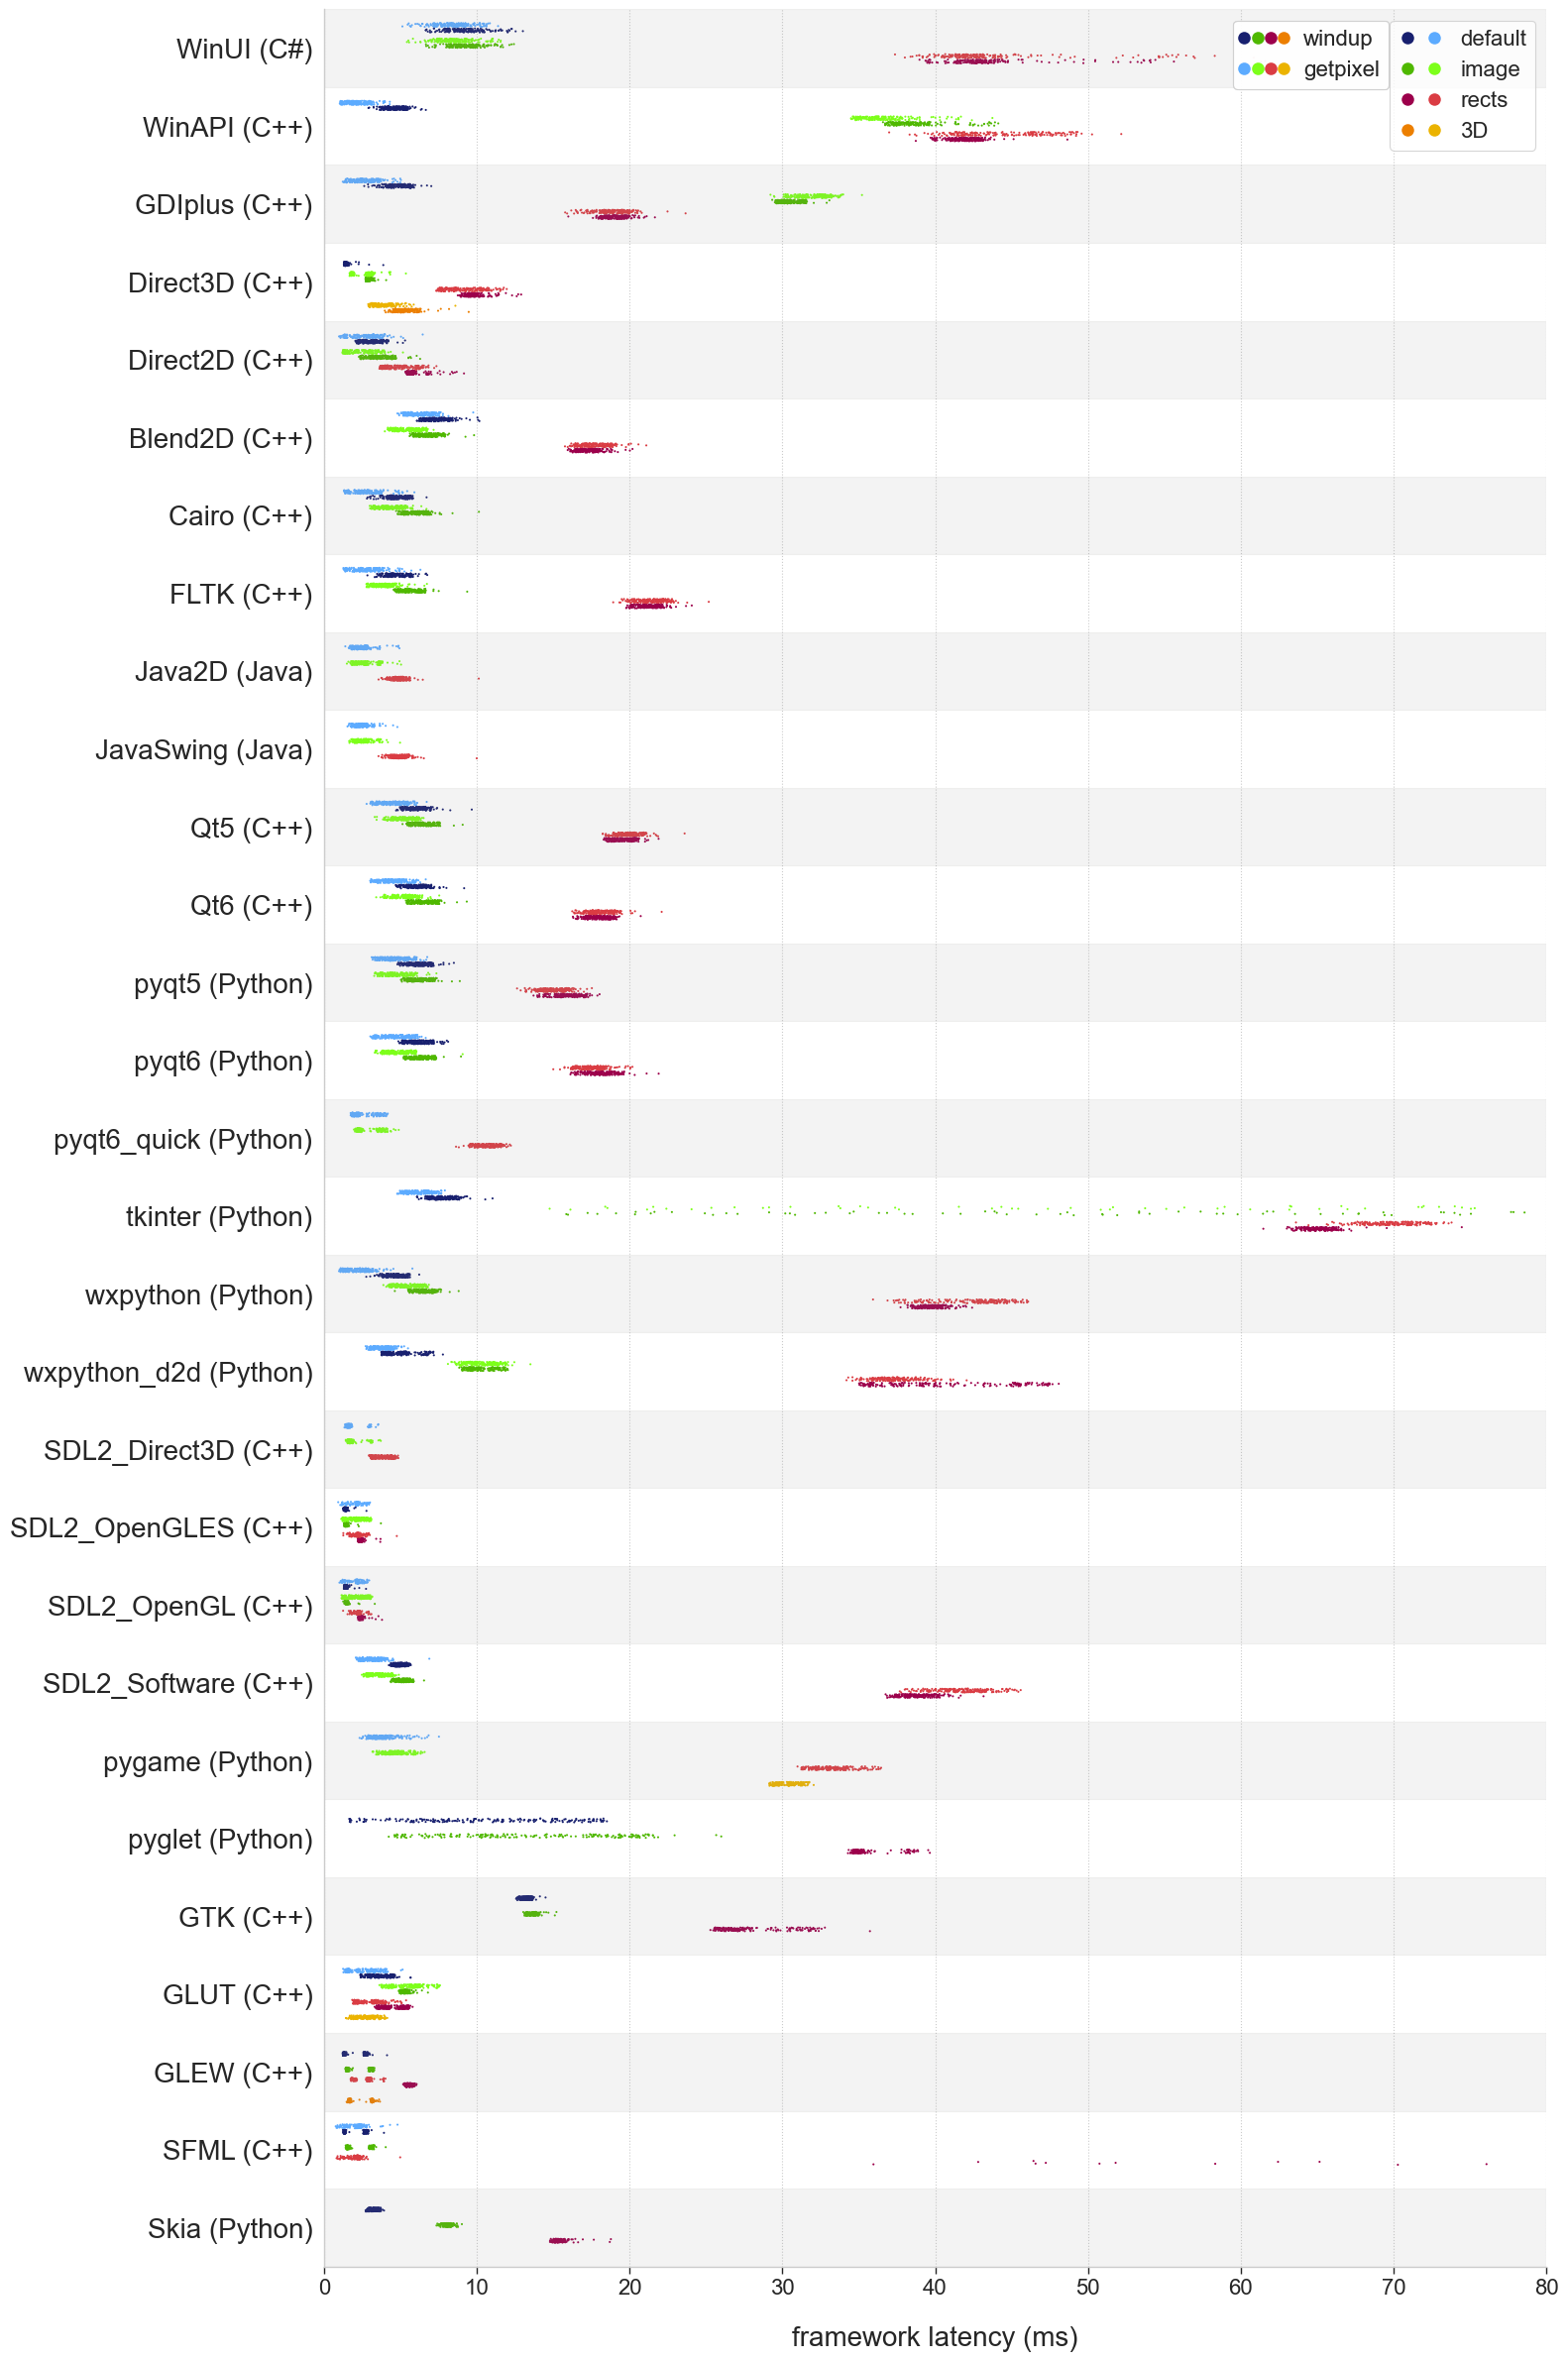

In [45]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(16, 24), "xtick.bottom": True, "grid.linestyle": ":"})

offset = lambda p: transforms.ScaledTranslation(0, p/72., plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data[data['program'] == 'windup'], y='framework', order=FRAMEWORK_ORDER, x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, size=1.5, transform=offset(0.05)+trans, zorder=1)
sns.stripplot(data=data[data['program'] == 'getpixel'], y='framework', order=FRAMEWORK_ORDER, x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=1.5, zorder=1)
# sns.pointplot(data[data['program'] == 'windup'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=0.6, palette=PALETTE_DARK, transform=offset(0.05)+trans, join=False, estimator=np.median, errorbar='sd', markersize=3, linewidth=1.5, zorder=2)
# plot = sns.pointplot(data[data['program'] == 'getpixel'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=0.6, palette=PALETTE_LIGHT, join=False, estimator=np.median, errorbar='sd', markersize=3, linewidth=1.5, zorder=2)

modified_labels = []
for ticklabel in plot.get_yticklabels():
    text = ticklabel.get_text()
    text_modified = f'{text} ({FRAMEWORK_LANGUAGE[text]})'
    ticklabel.set_text(text_modified)
    modified_labels.append(ticklabel)
plot.set_yticklabels(modified_labels)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        plot.axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# increase label size
plot.set_xlabel('framework latency (ms)', fontsize=20)
plot.xaxis.labelpad = 20
plot.set_ylabel('')

plot.set_xlim(left=0, right=80)  # note that cairo rects, pyglet 3d, and some tkinter image are cut off
plot.tick_params(axis='y', labelsize=20)
plot.tick_params(axis='x', labelsize=16)
plt.legend(title='', fontsize=20, loc='upper right')

handles, labels = plot.get_legend_handles_labels()
print(handles)
print(labels)

handles_windup = (handles[0], handles[1], handles[2], handles[3])
handles_getpixel = (handles[4], handles[5], handles[6], handles[7])

handles_default = (handles[0], handles[4])
handles_image = (handles[1], handles[5])
handles_rects = (handles[2], handles[6])
handles_3d = (handles[3], handles[7])

condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=6., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=6., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(0.88, 1), fontsize=16)

plt.gca().add_artist(condition_legend)
plt.gca().add_artist(program_legend)

plt.gca().invert_yaxis()
sns.despine(bottom = False, left = False)
plt.tight_layout()
plt.savefig("./figures/frameworks_results_language.pdf", format='pdf', bbox_inches='tight')

[<matplotlib.lines.Line2D object at 0x0000020C025097C0>, <matplotlib.lines.Line2D object at 0x0000020C0248C6E0>, <matplotlib.lines.Line2D object at 0x0000020C024213A0>, <matplotlib.lines.Line2D object at 0x0000020C02493680>, <matplotlib.lines.Line2D object at 0x0000020C027997C0>, <matplotlib.lines.Line2D object at 0x0000020C0250BF20>, <matplotlib.lines.Line2D object at 0x0000020C02484290>, <matplotlib.lines.Line2D object at 0x0000020C0265A330>]
['default', 'image', 'rects', '3D', 'default', 'image', 'rects', '3D']


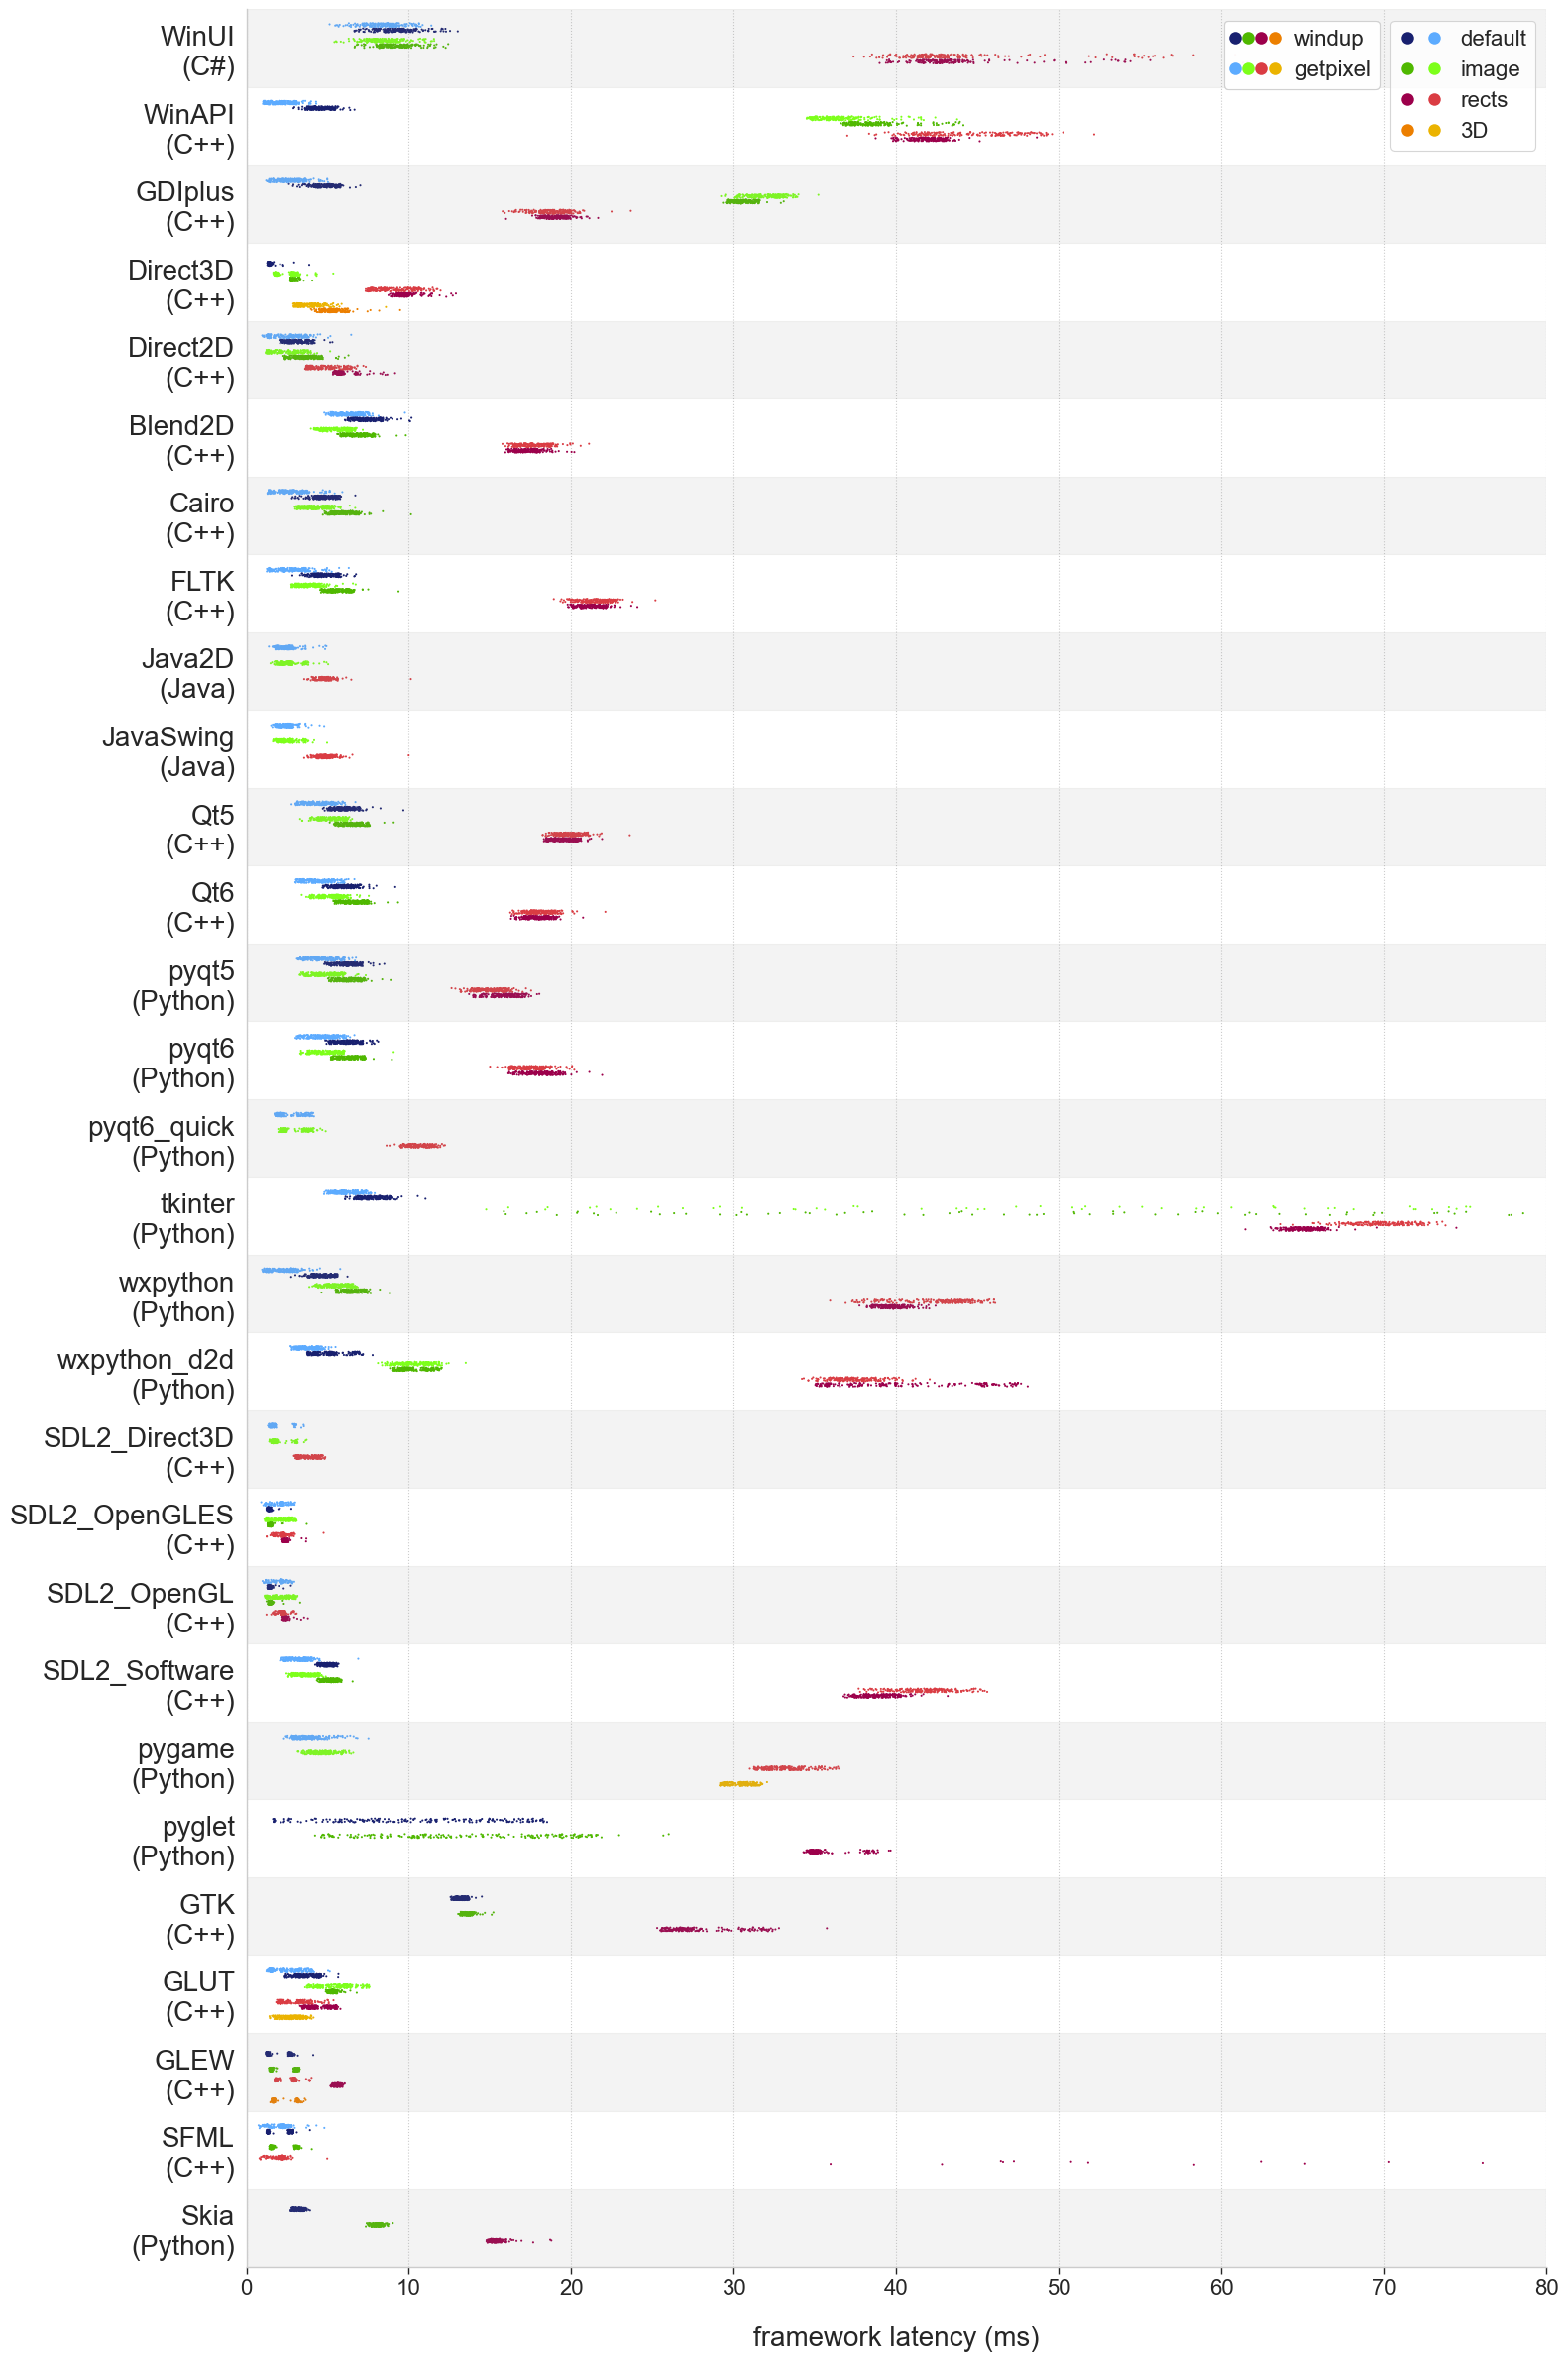

In [46]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(16, 24), "xtick.bottom": True, "grid.linestyle": ":"})

offset = lambda p: transforms.ScaledTranslation(0, p/72., plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data[data['program'] == 'windup'], y='framework', order=FRAMEWORK_ORDER, x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, size=1.5, transform=offset(0.05)+trans, zorder=1)
sns.stripplot(data=data[data['program'] == 'getpixel'], y='framework', order=FRAMEWORK_ORDER, x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=1.5, zorder=1)
# sns.pointplot(data[data['program'] == 'windup'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=0.6, palette=PALETTE_DARK, transform=offset(0.05)+trans, join=False, estimator=np.median, errorbar='sd', markersize=3, linewidth=1.5, zorder=2)
# plot = sns.pointplot(data[data['program'] == 'getpixel'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=0.6, palette=PALETTE_LIGHT, join=False, estimator=np.median, errorbar='sd', markersize=3, linewidth=1.5, zorder=2)

modified_labels = []
for ticklabel in plot.get_yticklabels():
    text = ticklabel.get_text()
    text_modified = f'{text}\n({FRAMEWORK_LANGUAGE[text]})'
    ticklabel.set_text(text_modified)
    modified_labels.append(ticklabel)
plot.set_yticklabels(modified_labels)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        plot.axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# increase label size
plot.set_xlabel('framework latency (ms)', fontsize=20)
plot.xaxis.labelpad = 20
plot.set_ylabel('')

plot.set_xlim(left=0, right=80)  # note that cairo rects, pyglet 3d, and some tkinter image are cut off
plot.tick_params(axis='y', labelsize=20)
plot.tick_params(axis='x', labelsize=16)
plt.legend(title='', fontsize=20, loc='upper right')

handles, labels = plot.get_legend_handles_labels()
print(handles)
print(labels)

handles_windup = (handles[0], handles[1], handles[2], handles[3])
handles_getpixel = (handles[4], handles[5], handles[6], handles[7])

handles_default = (handles[0], handles[4])
handles_image = (handles[1], handles[5])
handles_rects = (handles[2], handles[6])
handles_3d = (handles[3], handles[7])

condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=6., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=6., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(0.88, 1), fontsize=16)

plt.gca().add_artist(condition_legend)
plt.gca().add_artist(program_legend)

plt.gca().invert_yaxis()
sns.despine(bottom = False, left = False)
plt.tight_layout()
plt.savefig("./figures/frameworks_results_newline.pdf", format='pdf', bbox_inches='tight')

In [24]:
# median table default

data_default = data[data['complexity'] == 'default']

data_rows = []
for framework in FRAMEWORK_ORDER:
    median_getpixel = data_default[(data_default['framework'] == framework) & (data_default['program'] == 'getpixel')]['fw'].median()
    median_windup = data_default[(data_default['framework'] == framework) & (data_default['program'] == 'windup')]['fw'].median()
    data_row = {'framework':framework, 'getpixel':median_getpixel, 'windup':median_windup}
    data_rows.append(data_row)

median_data = pd.DataFrame(data_rows)

df_rounded = median_data.copy()
df_rounded['getpixel'] = df_rounded['getpixel'].astype(float).round(2)
df_rounded['windup'] = df_rounded['windup'].astype(float).round(2)

print(df_rounded.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

df_rounded


\begin{tabular}{lrr}
\toprule
framework & getpixel & windup \\
\midrule
WinUI & 8.45 & 9.15 \\
WinAPI & 2.15 & 4.59 \\
GDIplus & 2.65 & 4.86 \\
Direct3D & NaN & 1.40 \\
Direct2D & 2.72 & 3.11 \\
Blend2D & 6.14 & 7.35 \\
Cairo & 2.65 & 4.67 \\
FLTK & 2.75 & 4.55 \\
Java2D & 2.53 & NaN \\
JavaSwing & 2.51 & NaN \\
Qt5 & 4.36 & 6.06 \\
Qt6 & 4.40 & 6.09 \\
pyqt5 & 4.50 & 6.22 \\
pyqt6 & 4.67 & 6.20 \\
pyqt6_quick & 2.20 & NaN \\
tkinter & 6.12 & 7.70 \\
wxpython & 2.33 & 4.56 \\
wxpython_d2d & 3.66 & 5.07 \\
SDL2_Direct3D & 1.59 & NaN \\
SDL2_OpenGLES & 2.15 & 1.41 \\
SDL2_OpenGL & 2.15 & 1.41 \\
SDL2_Software & 3.21 & 4.96 \\
pygame & 3.66 & NaN \\
pyglet & NaN & 10.29 \\
GTK & NaN & 13.14 \\
GLUT & 2.36 & 3.60 \\
GLEW & NaN & 1.39 \\
SFML & 2.24 & 2.61 \\
Skia & NaN & 3.24 \\
\bottomrule
\end{tabular}



,framework,getpixel,windup
0,WinUI,8.45,9.15
1,WinAPI,2.15,4.59
2,GDIplus,2.65,4.86
3,Direct3D,NaN,1.40
4,Direct2D,2.72,3.11
5,Blend2D,6.14,7.35
6,Cairo,2.65,4.67
7,FLTK,2.75,4.55
8,Java2D,2.53,NaN
9,JavaSwing,2.51,NaN


In [25]:
# median table image

data_default = data[data['complexity'] == 'image']

data_rows = []
for framework in FRAMEWORK_ORDER:
    median_getpixel = data_default[(data_default['framework'] == framework) & (data_default['program'] == 'getpixel')]['fw'].median()
    median_windup = data_default[(data_default['framework'] == framework) & (data_default['program'] == 'windup')]['fw'].median()
    data_row = {'framework':framework, 'getpixel':median_getpixel, 'windup':median_windup}
    data_rows.append(data_row)

median_data = pd.DataFrame(data_rows)

df_rounded = median_data.copy()
df_rounded['getpixel'] = df_rounded['getpixel'].astype(float).round(2)
df_rounded['windup'] = df_rounded['windup'].astype(float).round(2)

print(df_rounded.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

df_rounded

\begin{tabular}{lrr}
\toprule
framework & getpixel & windup \\
\midrule
WinUI & 8.47 & 9.25 \\
WinAPI & 36.26 & 38.28 \\
GDIplus & 32.09 & 30.45 \\
Direct3D & 2.84 & 2.83 \\
Direct2D & 2.19 & 3.63 \\
Blend2D & 5.62 & 6.76 \\
Cairo & 4.28 & 6.01 \\
FLTK & 3.77 & 5.59 \\
Java2D & 2.58 & NaN \\
JavaSwing & 2.66 & NaN \\
Qt5 & 5.28 & 6.45 \\
Qt6 & 5.22 & 6.60 \\
pyqt5 & 4.65 & 6.34 \\
pyqt6 & 4.74 & 6.39 \\
pyqt6_quick & 2.42 & NaN \\
tkinter & 138.00 & 112.95 \\
wxpython & 5.52 & 6.50 \\
wxpython_d2d & 10.36 & 9.88 \\
SDL2_Direct3D & 1.69 & NaN \\
SDL2_OpenGLES & 2.14 & 1.45 \\
SDL2_OpenGL & 2.23 & 1.45 \\
SDL2_Software & 3.58 & 5.20 \\
pygame & 4.67 & NaN \\
pyglet & NaN & 12.60 \\
GTK & NaN & 13.68 \\
GLUT & 5.62 & 5.31 \\
GLEW & NaN & 1.62 \\
SFML & NaN & 1.58 \\
Skia & NaN & 8.06 \\
\bottomrule
\end{tabular}



,framework,getpixel,windup
0,WinUI,8.47,9.25
1,WinAPI,36.26,38.28
2,GDIplus,32.09,30.45
3,Direct3D,2.84,2.83
4,Direct2D,2.19,3.63
5,Blend2D,5.62,6.76
6,Cairo,4.28,6.01
7,FLTK,3.77,5.59
8,Java2D,2.58,NaN
9,JavaSwing,2.66,NaN


In [26]:
# median table rects

data_default = data[data['complexity'] == 'rects']

data_rows = []
for framework in FRAMEWORK_ORDER:
    median_getpixel = data_default[(data_default['framework'] == framework) & (data_default['program'] == 'getpixel')]['fw'].median()
    median_windup = data_default[(data_default['framework'] == framework) & (data_default['program'] == 'windup')]['fw'].median()
    data_row = {'framework':framework, 'getpixel':median_getpixel, 'windup':median_windup}
    data_rows.append(data_row)

median_data = pd.DataFrame(data_rows)

df_rounded = median_data.copy()
df_rounded['getpixel'] = df_rounded['getpixel'].astype(float).round(2)
df_rounded['windup'] = df_rounded['windup'].astype(float).round(2)

print(df_rounded.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

df_rounded

\begin{tabular}{lrr}
\toprule
framework & getpixel & windup \\
\midrule
WinUI & 42.37 & 42.83 \\
WinAPI & 43.92 & 42.00 \\
GDIplus & 18.84 & 19.10 \\
Direct3D & 8.79 & 9.67 \\
Direct2D & 4.63 & 5.80 \\
Blend2D & 17.62 & 17.30 \\
Cairo & 226.73 & 230.39 \\
FLTK & 21.52 & 21.21 \\
Java2D & 4.88 & NaN \\
JavaSwing & 4.82 & NaN \\
Qt5 & 19.89 & 19.55 \\
Qt6 & 17.97 & 18.03 \\
pyqt5 & 14.85 & 15.83 \\
pyqt6 & 17.52 & 18.14 \\
pyqt6_quick & 10.53 & NaN \\
tkinter & 69.77 & 65.17 \\
wxpython & 43.02 & 39.76 \\
wxpython_d2d & 37.27 & 39.55 \\
SDL2_Direct3D & 3.78 & NaN \\
SDL2_OpenGLES & 2.23 & 2.39 \\
SDL2_OpenGL & 2.24 & 2.41 \\
SDL2_Software & 41.84 & 38.72 \\
pygame & 33.13 & NaN \\
pyglet & NaN & 34.98 \\
GTK & NaN & 27.09 \\
GLUT & 2.58 & 4.23 \\
GLEW & 2.92 & 5.56 \\
SFML & 2.22 & 225.41 \\
Skia & NaN & 15.34 \\
\bottomrule
\end{tabular}



,framework,getpixel,windup
0,WinUI,42.37,42.83
1,WinAPI,43.92,42.00
2,GDIplus,18.84,19.10
3,Direct3D,8.79,9.67
4,Direct2D,4.63,5.80
5,Blend2D,17.62,17.30
6,Cairo,226.73,230.39
7,FLTK,21.52,21.21
8,Java2D,4.88,NaN
9,JavaSwing,4.82,NaN


In [27]:
# median table 3D

data_default = data[data['complexity'] == '3D']

data_rows = []
for framework in FRAMEWORK_ORDER:
    median_getpixel = data_default[(data_default['framework'] == framework) & (data_default['program'] == 'getpixel')]['fw'].median()
    median_windup = data_default[(data_default['framework'] == framework) & (data_default['program'] == 'windup')]['fw'].median()
    data_row = {'framework':framework, 'getpixel':median_getpixel, 'windup':median_windup}
    data_rows.append(data_row)

median_data = pd.DataFrame(data_rows)

df_rounded = median_data.copy()
df_rounded['getpixel'] = df_rounded['getpixel'].astype(float).round(2)
df_rounded['windup'] = df_rounded['windup'].astype(float).round(2)

print(df_rounded.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

df_rounded

\begin{tabular}{lrr}
\toprule
framework & getpixel & windup \\
\midrule
WinUI & NaN & NaN \\
WinAPI & NaN & NaN \\
GDIplus & NaN & NaN \\
Direct3D & 3.68 & 5.17 \\
Direct2D & NaN & NaN \\
Blend2D & NaN & NaN \\
Cairo & NaN & NaN \\
FLTK & NaN & NaN \\
Java2D & NaN & NaN \\
JavaSwing & NaN & NaN \\
Qt5 & NaN & NaN \\
Qt6 & NaN & NaN \\
pyqt5 & NaN & NaN \\
pyqt6 & NaN & NaN \\
pyqt6_quick & NaN & NaN \\
tkinter & NaN & NaN \\
wxpython & NaN & NaN \\
wxpython_d2d & NaN & NaN \\
SDL2_Direct3D & NaN & NaN \\
SDL2_OpenGLES & NaN & NaN \\
SDL2_OpenGL & NaN & NaN \\
SDL2_Software & NaN & NaN \\
pygame & 30.41 & NaN \\
pyglet & NaN & 97.73 \\
GTK & NaN & NaN \\
GLUT & 2.82 & NaN \\
GLEW & NaN & 1.70 \\
SFML & NaN & NaN \\
Skia & NaN & NaN \\
\bottomrule
\end{tabular}



,framework,getpixel,windup
0,WinUI,NaN,NaN
1,WinAPI,NaN,NaN
2,GDIplus,NaN,NaN
3,Direct3D,3.68,5.17
4,Direct2D,NaN,NaN
5,Blend2D,NaN,NaN
6,Cairo,NaN,NaN
7,FLTK,NaN,NaN
8,Java2D,NaN,NaN
9,JavaSwing,NaN,NaN
